In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'D:\Work\2019.12\how-isis-uses-twitter\tweets.csv')

In [3]:
data

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:46,#Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:50,#Breaking\n\n Iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:51,#Breaking \n#AmaqAgency \n#IslamicState \n\n#E...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 16:07,#PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...


In [4]:
# This is a list of mostly used 1000 English words. 
with open(r'D:\Work\2019.12\how-isis-uses-twitter\1-1000.txt') as common_words:
    common_words = common_words.read()
common_words = common_words.split('\n')
common_words = [i.lower() for i in common_words]

In [5]:
# Find all the unique accounts in this dataset.
names = []
for i in data['username']:
    i = i.lower()
    names.append(i)
names = set(names)

In [6]:
from nltk import word_tokenize

In [7]:
originality = {} # Who is the first account mentioning one word?
word_count = {} # How many times is one word used?
word_by_user = {} # Which words has one account used?
follower_count = {} # How many followers does each account have?

for i in names:
    word_by_user[i] = []
    
for i in data.iterrows():
    tags = []
    name = i[1]['username'].lower()
    follower = i[1]['followers']
    follower_count[name] = follower
    statutses = i[1]['numberstatuses']
    tweet = i[1]['tweets'].lower()
    if 'ENGLISH TRANSLATION: ' in tweet:
        tweet.replace('ENGLISH TRANSLATION: ','')
    tweet = set(word_tokenize(tweet)) # We only count each unique word once in one tweet.
    
    for word in tweet:
        if word.isalpha(): # We ignore all the strings that contain no letter.
            if word not in common_words: # We only count words that are not commonly used.
                word_by_user[name].append(word)
                if word not in originality:
                    originality[word] = name
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1

In [8]:
for i in word_by_user.keys(): 
    word_by_user[i] = set(word_by_user[i]) # We only count each unique word once for every account.

In [10]:
word_used_by = {} # Who used one specific word?
for i in originality:
    word_used_by[i] = []
for word in word_count.keys():
    if word_count[word] > 100: # Words that are only used once are taken out.
        for name in names:
            if word in word_by_user[name]:
                word_used_by[word].append(name)

In [12]:
connection = []
column_owner, column_user, column_follower_user, column_follower_owner, column_word = [], [], [], [], []
for word in word_used_by:
    owner = originality[word]
    users = word_used_by[word]
    for user in users:
        if user != owner:
            connection.append((owner, user, word))
            column_owner.append(owner)
            column_user.append(user)
            column_word.append(word)
            column_follower_user.append(follower_count[user])
            column_follower_owner.append(follower_count[owner])

In [13]:
len(connection)

6176

In [14]:
graph_user_follower = pd.DataFrame({'Source':column_owner, 'Target':column_user, 'Weight':column_follower_user, 'Word':column_word}) # The Weight column here is measured by the followers of the receiving acoount.

In [15]:
graph_owner_follower = pd.DataFrame({'Source':column_owner, 'Target':column_user, 'Weight':column_follower_owner, 'Word':column_word}) # The Weight column here is measured by the followers of the receiving acoount.

In [16]:
graph_user_follower.to_csv('ISIS_twitter_graph_user_100.csv',index=False)
graph_owner_follower.to_csv('ISIS_twitter_graph_owner_100.csv',index=False)

In [17]:
follower_count['baqiyais']

25

In [21]:
follower_count['al_nusra']

313

In [170]:

keymax = max(follower_count, key=follower_count.get) 

In [171]:
keymax

'ramiallolah'

In [22]:
follower_count['ramiallolah']

34692

In [25]:
user_score = {}
followers = {}

for i in names:
    user_score[i] = 0
    followers[i] = 0
    
for i in data.iterrows():
    
    tags = []
    name = i[1]['username'].lower()
    follower = i[1]['followers']
    follower_count[name] = follower
    statutses = i[1]['numberstatuses']
    tweet = i[1]['tweets'].lower()
    if 'ENGLISH TRANSLATION: ' in tweet:
        tweet.replace('ENGLISH TRANSLATION: ','')
    tweet = set(word_tokenize(tweet)) # We only count each unique word once in one tweet.
    
    followers[name] += follower
    for word in tweet:
        if word.isalpha(): # We ignore all the strings that contain no letter.
            if word not in common_words: # We only count words that are not commonly used.
                if word_count[word] > 2:
                    owner = originality[word]
                    if owner != name:
                        user_score[owner] += follower * 0.5
                        user_score[name] += follower * 1
                    else:
                        user_score[name] += follower * 1

In [26]:
compare = {}
for i in user_score.keys():
    compare[i] = [user_score[i], followers[i]]

In [27]:
compare

{'maghrebiq': [104896.5, 8000],
 'al_nusra': [17218011.0, 35313],
 'eplc24': [665497.0, 74016],
 'mustafaklash56': [89173.5, 9860],
 'klakishinki': [1379945.0, 179100],
 'yazeeddhardaa25': [32244593.5, 54185],
 'uncle_samcoco': [18475154.5, 2483380],
 'suspend_me_fags': [10444.0, 1862],
 '432mryam': [35454.0, 11492],
 '04_8_1437': [32021, 3479],
 'bilalibnrabah1': [487551.5, 4502],
 'maghrebihd': [1027285.0, 142396],
 'mhzbnt': [103606.0, 13824],
 'fidaee_fulaani': [2226043.5, 114969],
 'ro34th': [3591696.5, 405709],
 'k_kid04': [24294.5, 3080],
 'pleaoftheummah': [205158.5, 17646],
 'alk___226': [38600, 8106],
 'alwala_bara': [1082792.5, 41100],
 'abubakerdimshqi': [15663176.0, 11893],
 'warreporter1': [15542894.0, 1816614],
 'abutariq040': [106931.5, 19032],
 'dabiqsweetsman': [9164.0, 1513],
 'mobi_ayubi': [10279712.5, 901942],
 'lnsldewar': [806129.0, 67483],
 'baqiyah_khilafa': [140068.5, 18527],
 'alamreeki4': [94147.5, 7104],
 'ramiallolah': [375141399.0, 46899555],
 'abuhanzala

In [28]:
import numpy

In [29]:
scores, follower_numbers = [], []
for i in compare.keys():
    scores.append(compare[i][0])
    follower_numbers.append(compare[i][1])

In [30]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Follower Count')

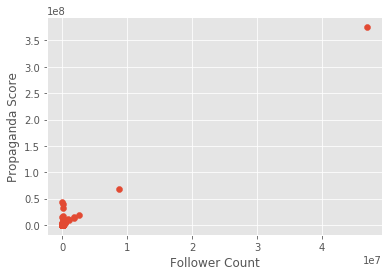

In [34]:
import matplotlib
matplotlib.style.use('ggplot')

plt.scatter(follower_numbers,scores)
plt.ylabel('Propaganda Score')
plt.xlabel('Follower Count')



In [82]:
common_words

['the',
 'of',
 'to',
 'and',
 'a',
 'in',
 'is',
 'it',
 'you',
 'that',
 'he',
 'was',
 'for',
 'on',
 'are',
 'with',
 'as',
 'I',
 'his',
 'they',
 'be',
 'at',
 'one',
 'have',
 'this',
 'from',
 'or',
 'had',
 'by',
 'not',
 'word',
 'but',
 'what',
 'some',
 'we',
 'can',
 'out',
 'other',
 'were',
 'all',
 'there',
 'when',
 'up',
 'use',
 'your',
 'how',
 'said',
 'an',
 'each',
 'she',
 'which',
 'do',
 'their',
 'time',
 'if',
 'will',
 'way',
 'about',
 'many',
 'then',
 'them',
 'write',
 'would',
 'like',
 'so',
 'these',
 'her',
 'long',
 'make',
 'thing',
 'see',
 'him',
 'two',
 'has',
 'look',
 'more',
 'day',
 'could',
 'go',
 'come',
 'did',
 'number',
 'sound',
 'no',
 'most',
 'people',
 'my',
 'over',
 'know',
 'water',
 'than',
 'call',
 'first',
 'who',
 'may',
 'down',
 'side',
 'been',
 'now',
 'find',
 'any',
 'new',
 'work',
 'part',
 'take',
 'get',
 'place',
 'made',
 'live',
 'where',
 'after',
 'back',
 'little',
 'only',
 'round',
 'man',
 'year',
 'ca

In [70]:
word_count

{'muhammed': 3,
 'english': 56,
 'http': 281,
 'al': 1471,
 'sheikh': 153,
 'translation': 31,
 'x8bzcscxzq': 1,
 'syria': 1682,
 'truthful': 6,
 'message': 47,
 '73xfszsjvr': 1,
 'co': 7852,
 'abu': 361,
 'maqdisi': 16,
 'a7nbjwyhbr': 1,
 'integrity': 2,
 'uqqzxggvtz': 1,
 'sacrifice': 7,
 'fatih': 2,
 'easy': 17,
 'people': 416,
 'jawlani': 11,
 'ha': 19,
 'audio': 20,
 'tgxt1gdgw7': 1,
 'zue8eisze6': 1,
 'meeting': 19,
 'first': 141,
 'nasir': 16,
 'victory': 56,
 '7bqk1wjazc': 1,
 '3qg5dkliwr': 1,
 'aqap': 53,
 'leader': 120,
 'promise': 7,
 'wuhayshi': 1,
 'baghdadis': 1,
 'dislike': 4,
 'statement': 66,
 'disbelievers': 19,
 'response': 16,
 '2eym9eymte': 1,
 'although': 8,
 'da': 25,
 'video': 340,
 'wah': 8,
 'link': 75,
 'soldier': 101,
 '4vuyszairt': 1,
 'second': 37,
 'epaprlph5w': 1,
 'jn': 56,
 'clip': 3,
 'series': 35,
 't9ixmtbvgk': 1,
 'murabit': 1,
 'hujlj9kgkg': 1,
 'oh': 34,
 'transcript': 1,
 'collection': 2,
 'ajbaywnxdq': 1,
 'lama': 1,
 'u': 182,
 'regarding': 30

In [73]:
followers['is_baqiya']

2500

In [41]:
word_count

{'muhammed': 3,
 'english': 56,
 'http': 281,
 'al': 1471,
 'sheikh': 153,
 'translation': 31,
 'x8bzcscxzq': 1,
 'syria': 1682,
 'truthful': 6,
 'message': 47,
 '73xfszsjvr': 1,
 'co': 7852,
 'abu': 361,
 'maqdisi': 16,
 'a7nbjwyhbr': 1,
 'integrity': 2,
 'uqqzxggvtz': 1,
 'sacrifice': 7,
 'fatih': 2,
 'easy': 17,
 'people': 416,
 'jawlani': 11,
 'ha': 19,
 'audio': 20,
 'tgxt1gdgw7': 1,
 'zue8eisze6': 1,
 'meeting': 19,
 'first': 141,
 'nasir': 16,
 'victory': 56,
 '7bqk1wjazc': 1,
 '3qg5dkliwr': 1,
 'aqap': 53,
 'leader': 120,
 'promise': 7,
 'wuhayshi': 1,
 'baghdadis': 1,
 'dislike': 4,
 'statement': 66,
 'disbelievers': 19,
 'response': 16,
 '2eym9eymte': 1,
 'although': 8,
 'da': 25,
 'video': 340,
 'wah': 8,
 'link': 75,
 'soldier': 101,
 '4vuyszairt': 1,
 'second': 37,
 'epaprlph5w': 1,
 'jn': 56,
 'clip': 3,
 'series': 35,
 't9ixmtbvgk': 1,
 'murabit': 1,
 'hujlj9kgkg': 1,
 'oh': 34,
 'transcript': 1,
 'collection': 2,
 'ajbaywnxdq': 1,
 'lama': 1,
 'u': 182,
 'regarding': 30

In [9]:
for i in data['tweets']:
    i = i.replace('ENGLISH TRANSLATION: ','')
    print(i.lower())

'a message to the truthful in syria - sheikh abu muhammed al maqdisi: http://t.co/73xfszsjvr http://t.co/x8bzcscxzq
sheikh fatih al jawlani 'for the people of integrity, sacrifice is  easy' http://t.co/uqqzxggvtz http://t.co/a7nbjwyhbr
first audio meeting with sheikh fatih al jawlani (ha): http://t.co/tgxt1gdgw7 http://t.co/zue8eisze6
sheikh nasir al wuhayshi (ha), leader of aqap: 'the promise of victory': http://t.co/3qg5dkliwr http://t.co/7bqk1wjazc
aqap: 'response to sheikh baghdadis statement 'although the disbelievers dislike it.' http://t.co/2eym9eymte
the second clip in a da'wah series by a soldier of jn: video link :http://t.co/epaprlph5w http://t.co/4vuyszairt
english transcript : oh murabit! : http://t.co/hujlj9kgkg http://t.co/t9ixmtbvgk
'a collection of the words of the u'lama regarding dawlah': http://t.co/ajbaywnxdq http://t.co/maycbhauzh
aslm please share our new account after the previous one was suspended.@khalidmaghrebi @seifulmaslul123 @cheerleadunited
aqap statement

rt @ramiallolah: #breakingnews #egypt|ian air forces f-16 jet reportedly crashed near #ismailia for unknown reasons. both pilots reportedly…
#amaqnews
religious course for 1200 functionaries of public services in sirte. details: https://t.co/93oz7fwraq https://t.co/3e7iziv9md
#wilayatninawa
activity of diwan of dawah &amp; masajid in the city of mosul. 📷 https://t.co/pmsxfkrgso https://t.co/pltnddg2vo
#wilayattarabulus 
☔ rain in the city of sirte. 
📷 https://t.co/qlhuahcnvk
📷 https://t.co/7hxx71kn5o https://t.co/lpsvsftegx
#wilayatalanbar
"two eyes shall not be touched by the fire". 📷 https://t.co/zzy75irraf https://t.co/twmqwzacuo
#maktabatalhimmah #billboard
"a day’s ribat in the cause of allah". 📷 https://t.co/sumo6htfjv https://t.co/gxl1q73yw0
rt @alhamdhulillaah: when allah ﷻ blesses you financially, don't raise your standard of living, raise your standard of giving
rt @raqqa_sl1: #syria dr.abdulrahman obaid got killed today "burned" by russian airstrikes on #anadan in #aleppo co

في الجنة حورية :-) 
https://t.co/aagaaqtc80
#usa-led coalition has killed 18+ hashd shiite militants near #ramadi in seems to be a 'deliberate' bombardment.. #iraq #isis
@barqah47 asc. vipi akhii:-) yaani ni kusumbuana ama, waambie hawa makafiri waachane nawewe)
rt @cxaafada2: في الجنة حورية :-) 
https://t.co/aagaaqtc80
#usa #pentagon: countries who can not join the anti #isis coalition militarily should financially contribute to it..
@barqah47 subhanallah,naiona akhii, sabr,mi naongojea ile siku watanipata-sithani kama nitarudi)
#russia supplies #assad with extra lethal weapons (mi-35m) while #usa kerry calls #syria|n rebels to cease fire.. https://t.co/agokczwlnc
rt @ramiallolah: graphic! #russia|n war criminals do not spare even those who fled #aleppo: we were hit with two rockets.. #syria https://t…
rt @sakirkhader: a message from a #syria|n doctor working in a field hospital in rebel-held talbiseh: "we're not afraid for #russia." https…
rt @uncle_samcoco: " londoners alexanda kote

oh boy @ctstudies .... https://t.co/5g6wryqsi0
@rraqqah im only mocking them (pakistan)
these will get #saudi air cover too in coming days https://t.co/ibqnmxdsrc
rt @qassam_arabic1: نحن فرسان لنا الخيل مهود ** إن دعا الداعي أجبنا للنداء
في سبيل الله نحيا ونموت ** في حياة العز أو موت الفداء
#القسام ht…
@9a9b3a710bfb47e @sayed_ridha @drpartizan_ due to kurds mocking prayer
rt @reportersyrien: syrian minister’s wife named to assess mental health of the displaced https://t.co/utbjmk1vc4
once before - they considered to partitioned iraq, and now... it's sham turn. https://t.co/iigmceu7v6
rt @nidalgazaui: the last message from #isis militants to #ypg before they fleed from #shahadi, #hasaka. https://t.co/dcst3rl6tv
rt @scotmikey1111: effective anti-isis propaganda, and corrupt #fsa leaders led some factions to prefer to surrender territory to #assad th…
rt @7layers_: #ypg communists inside a mosque mocking the main pillar of islam, islamic prayer -via @drpartizan_ https://t.co/ayxeb4meze
@7

oh btw, those who are "mujahideen" in the eyes of aq &amp; sahwat joined sdf yesterday.

"liwa jund al haramayn" https://t.co/kin1haadps
but it's ok, abu qatada said that not everyone who commits kufr has become a kafir.
there is also what maqdisi said, the "udhur bi fitnat daesh" that is like a barrier between imaan &amp; kufr, it protects your islam from kufr.
@asapmafia_ @ottomanakh all prophets and those who followed them until a new prophet was sent to them is a muslim
@asapmafia_ @ottomanakh for example jews who followed their prophets until isaa as was sent are muslims,
@asapmafia_ @ottomanakh &amp; jews who rejected jesus became kafir,
there is nothing more stupid than syrians still protesting for democracy. what about 4,70,000 killed?
@sabahjaan pehle nhi hota tha kya?
the term syrian revolution is corrupted in itself, by it they mean a democratic secular syria.
there is theory and then there is practice, there is huge difference between the two.
@sabahjaan lol probably your t

rt @warreporter1: islamic state forces inflict devastating losses on assad's forces in palmyra, with reports of hundreds of corpses: https:…
its amazing that a limited fighting force is able to hold a city when it is leveled to the ground like this and... https://t.co/bqa72wikpa
rt @nidalgazaui: this is why #palmyra is the most strategic city in #syria. https://t.co/0ftjn2qh27
reports coming in that assad has recaptured palmyra from islamic state. this is hardly ever a surprise because... https://t.co/vnj3oxheyc
reports coming in that assad has recaptured palmyra from islamic state. this is hardly ever a surprise because... https://t.co/xqkpijl9lu
rafidi cowards flee in first 'mosul operation'. https://t.co/tstn7kuxpi via @thedailybeast
syrian city of palmyra reduced to rubbles. palmyra battle ended this morning after 48 hrs of fierce fightings in... https://t.co/ojvidmkiuf
despite nato artillery &amp; us aircover, #is regains control of tuqali village (marked in red) in n-aleppo from 

#ولاية_صلاح_الدين 
إحراق أربع ثكنات للروافض على طريق #حديثة #بيجي
#الحشد_الشعبي #هيت #الانبار #الشرقاط #مكحول
https://t.co/fvpctp9zpn
#ولاية_صلاح_الدين 
إحراق أربع ثكنات للروافض على طريق #حديثة #بيجي
#الحشد_الشعبي #هيت #كربلاء #مخمور #الموصل #بغداد https://t.co/fvpctp9zpn
اسعد الله اوقاتكم يا انصار

استعدوا لنا صولة بعد قليل

#مجاهد_أنت_أيها_الإعلامي
#حَتْىٰ_لَا_يُهْجَرْ_إنشُرْ_تُؤجَرْ https://t.co/mnxwq6nzg3
rt @pzf: breaking news: active shooter at lackland afb. heavily armed police arrive at scene. https://t.co/opnwdjq7ww https://t.co/spdc9k2a…
#isis 
#amaqagency 
#damascus
📰  #isis fighters take control of arubah checkpoint
#nationalbeerday 
#nltsrinagar https://t.co/fjrgicj56y
so removing the shariah of allah is a major sin but it's not kufr?  https://t.co/dfrwvfzdj4
#isis 
#amaqagency 
#damascus
📰  #isis fighters take control of arubah checkpoint
#cursedavidcameron 
#alkhayr https://t.co/gr5psv9jet
#isis 
#amaqagency 
#damascus
📰  #isis fighters take control of arubah checkpoint


rt @sparksofirhabi3: turn to allah https://t.co/ytqrkkrdtz
rt @sparksofirhabi3: dont be weak in pursuit of the enemy https://t.co/mmdqvy3u0y
rt @sparksofirhabi3: when rasulullah ﷺ was injured at uhud https://t.co/chrlqjiwhr
rt @sparksofirhabi3: when the angels descended at hunain https://t.co/pebni0lplu
rt @sparksofirhabi3: rasulullah ﷺ calls the muslims back to battle https://t.co/6qhbrak6xr
rt @sparksofirhabi3: the muslims are caught by surprise &amp; start to flee https://t.co/1mqnq8nj6m
rt @sparksofirhabi3: salah is  comfort and support https://t.co/qcjkqw7f3c
rt @sparksofirhabi3: his reward is surely incumbent upon allah https://t.co/g9c8yzhu5x
rt @sparksofirhabi3: ratio of yajuj &amp; majuj in hellfire https://t.co/9viyafoqt2
rt @sparksofirhabi3: the words of miqdad https://t.co/qdcr5a3vxp
rt @sparksofirhabi3: get married and have lots of children https://t.co/vjiwwm1uae
rt @sparksofirhabi3: every muslim should be protecting islam from their direction https://t.co/w2mianjguu
rt @

#is forces carry out martyrdom operation at mount  makhoul  outskirts against shia militias https://t.co/4gcezeas8s
#breaking
#is
wilaya halab
liberation of dudein and entering of hawar kilis/dalha/harjala killing many vso apostates https://t.co/zinnawepqf
#is forces withdrew after intense #us led-coalition bombing on the villages
lol #is infor graphics went viral that every dog in #syria is making theirs
this is a comedy😂 https://t.co/qthejw7oct
#breakingnews
#amaqagency
15 rawafidh militants killed in inghimasi op on tank battalion near biji  refinery https://t.co/la0ucwt2wz
#russia already creating a base in #palmyra after #is withdrawal while #russian crusaders occupying #syria https://t.co/eaxleqytx3
another crusader died as a result of injury in #iraq today  https://t.co/shupytvzil
#pt don't believe that 'non-battle related' nonsence
@hussein_mujahi2 i think he was among those who got airlifted out by helicopter during the recent battle and succumbed to his injuries later
#is new